In [1]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix,parallel_coordinates
import seaborn as sns
import plotly.express as px
from folium.plugins import HeatMap
import folium
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.preprocessing import scale,LabelEncoder,StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report,silhouette_samples, silhouette_score
import xgboost
import tensorflow as tf
from tensorflow import keras
import shap

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from yellowbrick.cluster.elbow import kelbow_visualizer


from scipy import stats

from statsmodels.tsa.ar_model import AutoReg, ARResults
from statsmodels.tsa import stattools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

from datetime import datetime
from meteostat import Point, Monthly

In [3]:
df_wout=pd.read_csv('df_wout.csv')

# Time Series
## Estimating the impact of covid-19 pandemic on aviation industry

In [4]:
dfwout_yearmonth=df_wout.groupby('year_month').agg(sum).loc[:,'arr_flights']
dfwout_yearmonth_2003_2019=dfwout_yearmonth.iloc[:-12]
dfwout_yearmonth_2003_2019.index=range(199)

In [5]:
#Ar model with lag 50
fitar=AutoReg(np.array(dfwout_yearmonth_2003_2019),lags=50)
fittedar=fitar.fit()

In [6]:
fittedar.params

array([ 3.58092827e+04,  6.67285680e-01,  2.99507872e-01,  2.23633769e-02,
       -3.75675693e-02,  1.39670968e-01, -1.12691438e-01,  4.24961382e-02,
        1.20757831e-01, -3.88652982e-01,  4.96224402e-02,  1.31308515e-01,
        1.42352584e-01, -2.01190554e-01,  1.86079229e-01,  1.27384076e-03,
        1.31876504e-02, -1.84144805e-01, -6.80352171e-02,  1.51390295e-01,
       -2.43991490e-03,  3.27204171e-02, -2.10565442e-01,  1.45419625e-01,
        1.06417759e-01, -2.54949665e-02, -5.70787267e-02, -1.51572252e-01,
       -4.35265554e-02,  2.12639577e-01,  1.07476373e-01, -1.78269135e-01,
       -1.43507012e-01,  1.30340081e-01,  1.48743730e-02,  2.10056260e-01,
        3.66601635e-01, -3.17007402e-01, -3.89287757e-01,  1.42627319e-01,
       -1.55445059e-02, -2.42915928e-01,  6.54900316e-02,  6.95465800e-03,
        1.17886352e-01,  2.29919804e-01,  1.12163640e-01, -5.46389129e-01,
        3.63747460e-01, -1.73813094e-01,  5.39033821e-02])

In [7]:
acorr_ljungbox(fittedar.resid)

,lb_stat,lb_pvalue
1,0.009223,0.923493
2,0.023610,0.988264
3,0.049010,0.997156
4,0.049480,0.999699
5,0.794878,0.977359
6,0.909580,0.988809
7,2.258403,0.944166
8,2.289709,0.970817
9,2.948678,0.966295
10,3.033073,0.980635


<Figure size 800x550 with 0 Axes>

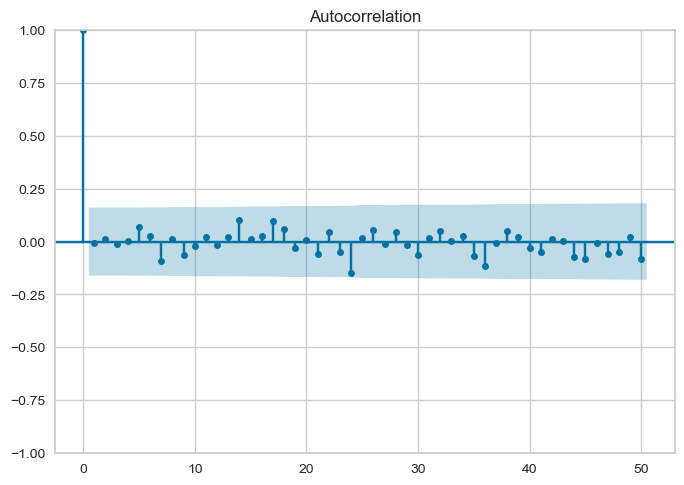

In [8]:
acorr_ljungbox(fittedar.resid)
plt.figure()
plot_acf(fittedar.resid,lags=50)
plt.show();


In [9]:
predar=fittedar.predict(start=199,end=210)
predar

array([381348.53789042, 364243.11771574, 411126.32626282, 373717.46915783,
       389145.73310566, 405013.03238952, 427993.95515328, 411823.38277498,
       374801.74184563, 381564.96596895, 358223.82200335, 378165.14099477])

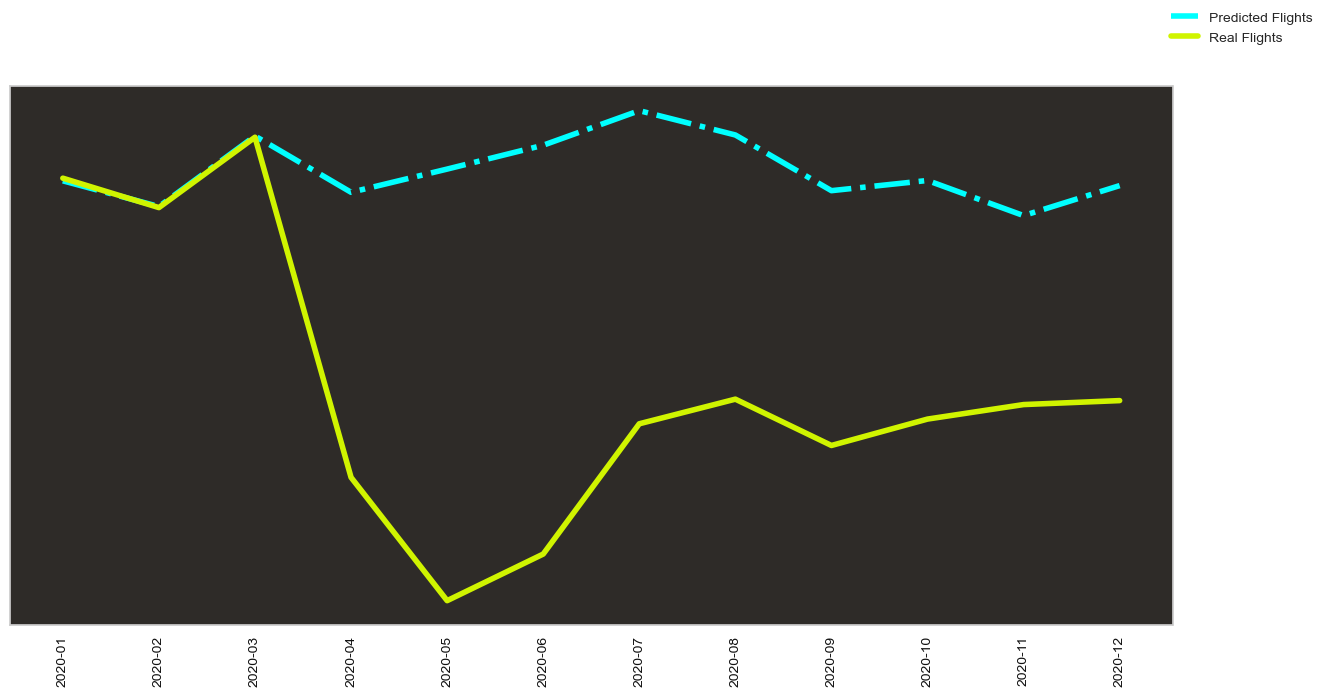

In [21]:
fig,ax=plt.subplots(figsize=(15,7))

ax.plot(predar,label='Predicted Flights',color= "#00ffff",linewidth=4,linestyle='dashdot')
ax.plot(dfwout_yearmonth.iloc[-12:],label='Real Flights',linewidth=4,color="#d0f400")

ax.set_xticks(dfwout_yearmonth.iloc[-12:].index)
ax.set_xticklabels(dfwout_yearmonth.iloc[-12:].index,rotation=90,color='k')

ax.set_yticks([])

ax.set_facecolor("#2e2b28")

ax.grid()
fig.legend()
plt.show();

In [22]:
#Number of missed flights due to Corona 
'{:,}'.format(round(np.sum(dfwout_yearmonth.iloc[-9:]-predar[-9:])))

'-1,728,661'